In [1]:
from SpinTools.spinhamiltonian import spinhamiltonian as sh
import numpy as np
from scipy.constants import physical_constants as spc
from scipy.constants import constants as sc
import itertools

h = spc["Planck constant"][0]

ham = sh.SpinHamiltonian("Bi")

In [2]:
def decorator(gamma_function):
    def wrapper_function(*args,**kwargs):
        return gamma_function(*args,**kwargs)
    return wrapper_function

@decorator
def zeeman(Bz):
    return ham.electron_zeeman([0,0,Bz]) + ham.nuclear_zeeman([0,0,Bz])

@decorator
def gamma(row,eigvec,hdrive):
    return list(map(lambda col : 1e24*abs(np.matmul(eigvec[:,col].conjugate(), 
                np.matmul(hdrive,eigvec[:,row]))), range(row+1,len(eigvec))))

@decorator
def hamiltonian(Bz):
    return ham.get_hamiltonian([0,0,Bz]) / h / 1e09
#     return ham.hyperfine()

@decorator
def estate(H):
    return np.linalg.eig(H)

@decorator
def E(evals):
    return evals[1] - evals[0]

def get_gamma_values(gam):
    gam = np.array([x for x in gam for x in x])
    gam = list(itertools.chain.from_iterable(gam))
    return list(filter(lambda a: a != 0, gam))

In [18]:
b = np.arange(0,1,0.01)

H = list(map(hamiltonian,b)) # Get spin hamiltonian
Hds = zeeman(1) # Get perturbation hamiltonian
e = list(map(estate,H)) # get eigenstates

# Get transition rate
gam = [[gamma(i,e[k][1],Hds) for i in range(len(Hds[0]))] for k in range(len(b))]

# Flatten transition rates and give only the values
gam = get_gamma_values(gam)

# Get eigenvalues for each matrix element
evals = [e[i][0] for i in range(len(b))]
energy = [abs(evals[i][1] - evals[i][0]) for i in range(len(b))]

In [4]:
from matplotlib import pyplot as plt
plt.plot(b[0:len(b)],gam)
plt.xlabel('$B$ ($T$)')
plt.ylabel('$\Gamma$',rotation=0)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (1516,)

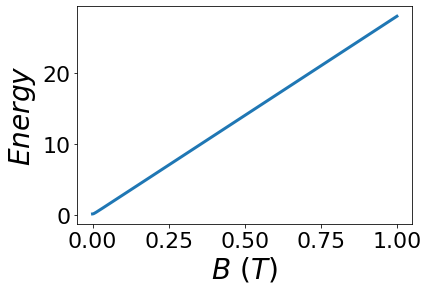

In [91]:
from matplotlib import pyplot as plt
plt.plot(b[0:len(b)],energy)
plt.xlabel('$B$ ($T$)')
plt.ylabel('$Energy$',rotation=90)
plt.show()

In [103]:
%timeit [[gamma(i,e[k][1],Hds) for i in range(len(Hds[0]))] for k in range(len(b))]

328 ms ± 2.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [104]:
%timeit [e[i][0] for i in range(len(b))]

825 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


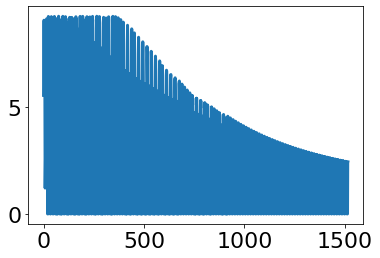

In [29]:
plt.plot(gam)

In [23]:
np.shape(gam[0:len(b)])

(100,)

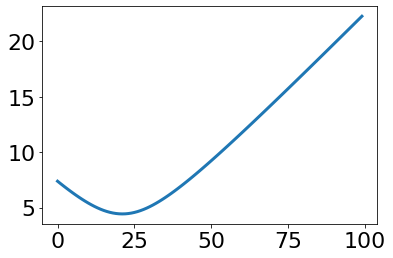

In [32]:
plt.plot(energy)

In [33]:
evals

[array([ 3.31913475+0.j, -4.05672025+0.j,  3.31913475+0.j, -4.05672025+0.j,
         3.31913475+0.j, -4.05672025+0.j, -4.05672025+0.j,  3.31913475+0.j,
        -4.05672025+0.j,  3.31913475+0.j, -4.05672025+0.j,  3.31913475+0.j,
        -4.05672025+0.j,  3.31913475+0.j,  3.31913475+0.j, -4.05672025+0.j,
         3.31913475+0.j, -4.05672025+0.j,  3.31913475+0.j,  3.31913475+0.j]),
 array([ 3.20788194+0.j, -3.9460245 +0.j,  3.23707225+0.j, -3.97423995+0.j,
         3.29377082+0.j, -4.03121705+0.j, -4.08732546+0.j,  3.3496007 +0.j,
        -4.14260385+0.j,  3.40460055+0.j, -4.16932942+0.j,  3.43230097+0.j,
        -4.11475756+0.j,  3.37745058+0.j,  3.32178922+0.j, -4.05937472+0.j,
         3.2652797 +0.j, -4.00314373+0.j,  3.17946325+0.j,  3.45880625+0.j]),
 array([ 3.09872624+0.j, -3.83742586+0.j,  3.15865122+0.j, -3.89540113+0.j,
         3.27361578+0.j, -4.01092275+0.j, -4.12290819+0.j,  3.38504416+0.j,
        -4.23166429+0.j,  3.4932432 +0.j, -4.2836865 +0.j,  3.54721512+0.j,
        